<a href="https://colab.research.google.com/github/s4bih/machine-learning/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
spam = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv')

In [5]:
spam


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
spam.shape

(5572, 2)

In [9]:
spam.columns = spam.columns.str.strip()

In [10]:
spam.columns = spam.columns.str.lower()

In [11]:
spam[spam.duplicated(subset=['category','message'], keep=False)]

,category,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [12]:
spam.drop_duplicates(subset=['category','message'], inplace=True)

In [15]:
spam['category'].value_counts()

,count
category,
ham,4516
spam,641


In [16]:
spam.loc[spam['category'] == 'ham', 'category'] = 0
spam.loc[spam['category'] == 'spam', 'category'] = 1

In [18]:
spam['category'] = spam['category'].astype(int)

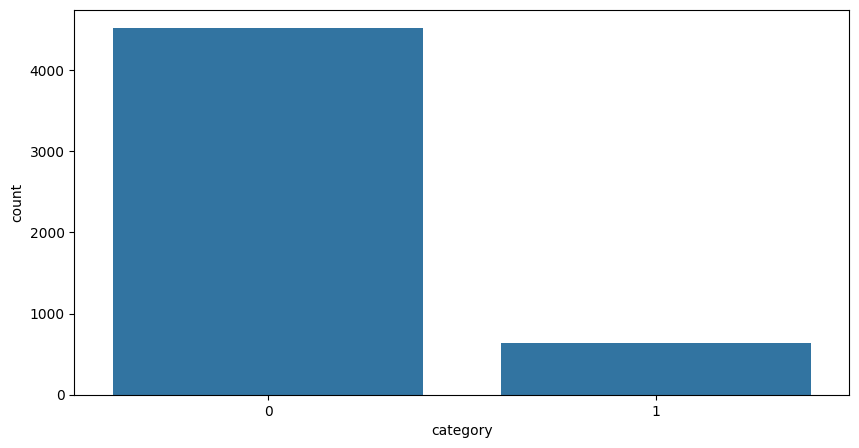

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='category', data=spam)
plt.show()

In [21]:
x = spam['message']
y = spam['category']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)